In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [91]:
# loading data
data = pd.read_csv('data/Alcohol_Sales.csv', index_col= 'DATE', parse_dates= True)
data.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [92]:
data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [93]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq='MS')

In [94]:
data.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [95]:
data = data.rename(columns={'S4248SM144NCEN': 'sales'})
data.head()

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [96]:
data.isna().sum()

sales    0
dtype: int64

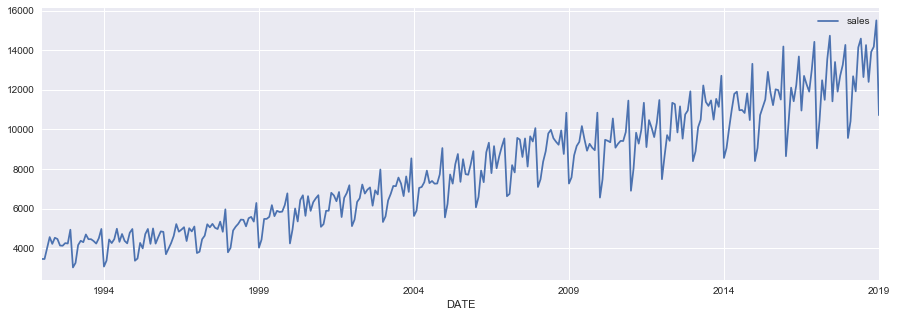

In [97]:
data.plot(figsize = (15,5), legend = True)
plt.show()

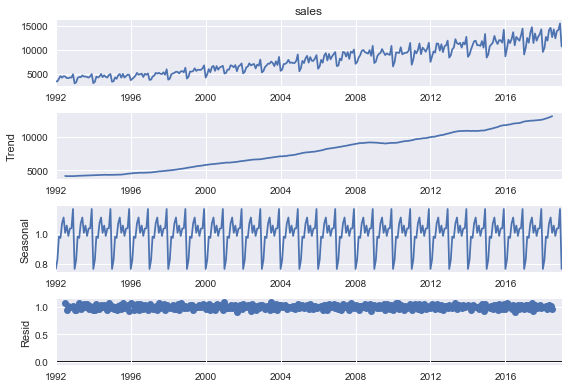

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data['sales'],model= 'mul').plot()
plt.show()

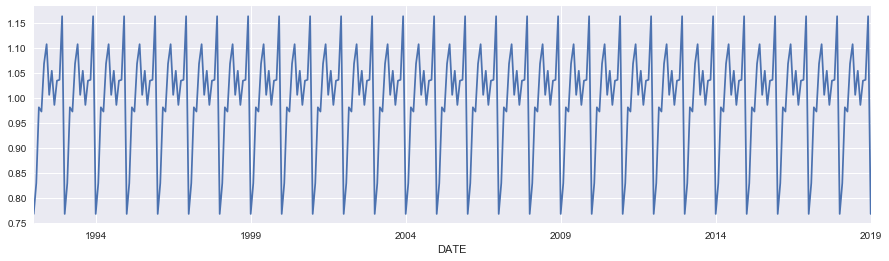

In [99]:
# seasonal componenet
seasonal_decompose(data['sales'],model= 'mul').seasonal.plot(figsize = (15,4))
plt.show()

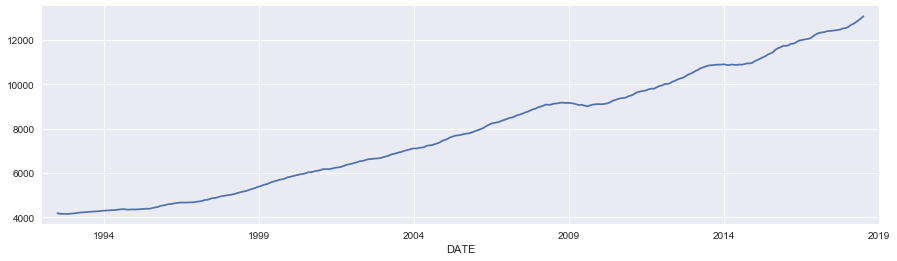

In [100]:
# trend component
seasonal_decompose(data['sales'],model= 'mul').trend.plot(figsize = (15,4))
plt.show()

In [101]:
# train and test split
# if you see the data it is monthly data so I would like to forecast 1 year (12) months into the future
print(len(data))
print(len(data)- 12) # subtracting 12 means I will forecast that data

train = data.iloc[ :314]
test = data.iloc[314: ]

325
313


In [102]:
## scaling the data (must for Deep Learning models
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train = sc.fit_transform(train)
scaled_test = sc.transform(test)

In [103]:
# model
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [104]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(data = scaled_train, targets= scaled_train, length= n_input, batch_size= 1 )

In [105]:
scaled_train.shape

(314, 1)

In [106]:
len(generator)

312

In [107]:
# what actually generator is giving ?
scaled_train[:5]

array([[-1.53481163],
       [-1.53517398],
       [-1.33805754],
       [-1.13441887],
       [-1.25870368]])

In [108]:
x, y = generator[0]
print(x,'\n')
print(y)

[[[-1.53481163]
  [-1.53517398]]] 

[[-1.33805754]]


- **Note**: it is clear that it takes first 2 elements and giving output of 1 element which we have in training data, depending on requirement we can alter the values of **n_inputs** and **batch_size**

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [110]:
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(data = scaled_train, targets= scaled_train, length= n_input, batch_size= 1 )

In [111]:
model = Sequential()
n_input = 12
n_features = 1
model.add(LSTM(units = 150, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [113]:
# fit the training data
model.fit_generator(generator = train_generator,epochs= 25 )

Epoch 1/25
302/302 [==============================] - 2s 6ms/step - loss: 0.5624
Epoch 2/25
302/302 [==============================] - 2s 5ms/step - loss: 0.1305
Epoch 3/25
302/302 [==============================] - 2s 5ms/step - loss: 0.1212
Epoch 4/25
302/302 [==============================] - 2s 5ms/step - loss: 0.1078
Epoch 5/25
302/302 [==============================] - 2s 5ms/step - loss: 0.0809
Epoch 6/25
302/302 [==============================] - 2s 5ms/step - loss: 0.0672
Epoch 7/25
302/302 [==============================] - 2s 5ms/step - loss: 0.0527
Epoch 8/25
302/302 [==============================] - 2s 6ms/step - loss: 0.0461
Epoch 9/25
302/302 [==============================] - 2s 5ms/step - loss: 0.0356
Epoch 10/25
302/302 [==============================] - 2s 6ms/step - loss: 0.0361
Epoch 11/25
302/302 [==============================] - 2s 6ms/step - loss: 0.0308
Epoch 12/25
302/302 [==============================] - 2s 5ms/step - loss: 0.0328
Epoch 13/25
302/302 [====

In [114]:
model.history.history

{'loss': [0.5623669091329196,
  0.13048383291085613,
  0.12122769348089102,
  0.10777592150357904,
  0.08091213264862933,
  0.06715677720635631,
  0.05271967487106662,
  0.046065093333485053,
  0.03558765192594511,
  0.03605050216480196,
  0.03080148826380847,
  0.032784412671990774,
  0.03457335074747997,
  0.027949964795809225,
  0.0357334597804115,
  0.028266922356466082,
  0.0315860745050992,
  0.03280728152365642,
  0.028849190077400767,
  0.029919434111954652,
  0.032072742346308254,
  0.031422854931424216,
  0.030591063950438886,
  0.024511527828266773,
  0.02973125819008627]}

In [115]:
model.history.history['loss']

[0.5623669091329196,
 0.13048383291085613,
 0.12122769348089102,
 0.10777592150357904,
 0.08091213264862933,
 0.06715677720635631,
 0.05271967487106662,
 0.046065093333485053,
 0.03558765192594511,
 0.03605050216480196,
 0.03080148826380847,
 0.032784412671990774,
 0.03457335074747997,
 0.027949964795809225,
 0.0357334597804115,
 0.028266922356466082,
 0.0315860745050992,
 0.03280728152365642,
 0.028849190077400767,
 0.029919434111954652,
 0.032072742346308254,
 0.031422854931424216,
 0.030591063950438886,
 0.024511527828266773,
 0.02973125819008627]

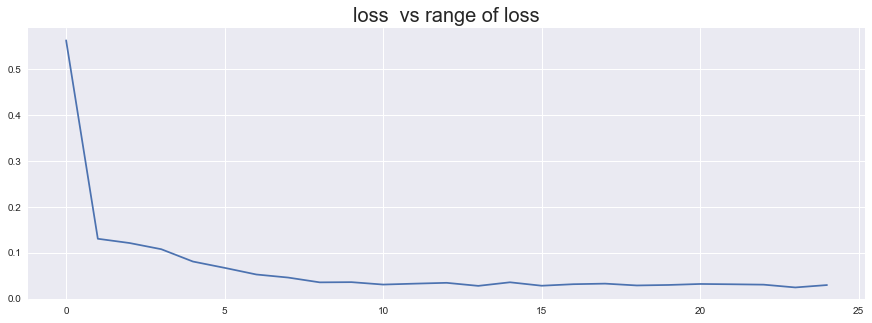

In [116]:
plt.figure(figsize= (15,5))
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])
plt.title('loss  vs range of loss', {'fontsize' : 20})
plt.show()

In [117]:
first_eval_batch = scaled_train[-12: ] # it will give last 12 records
first_eval_batch

array([[1.73427755],
       [1.37555462],
       [2.11981412],
       [2.5491946 ],
       [1.34837864],
       [2.06799859],
       [1.52629072],
       [1.81761723],
       [2.01690774],
       [2.38070353],
       [0.67731312],
       [0.9856699 ]])

In [118]:
# we need to reshape this
n_input = 12
n_features = 1
first_eval_batch.reshape((1, n_input, n_features))

array([[[1.73427755],
        [1.37555462],
        [2.11981412],
        [2.5491946 ],
        [1.34837864],
        [2.06799859],
        [1.52629072],
        [1.81761723],
        [2.01690774],
        [2.38070353],
        [0.67731312],
        [0.9856699 ]]])

In [119]:
first_eval_batch.shape

(12, 1)

In [120]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [121]:
# predict on these 12 points
model.predict(first_eval_batch)

array([[2.1684217]], dtype=float32)

### Forecast using RNN model

In [124]:
# holding predictions
test_predictions = []

n_input = 12
n_features = 1

# last n_input points from the training dataset
first_eval_batch = scaled_train[-n_input :]

# reshape this as RNN format(same format as time series generator wants)
current_batch = first_eval_batch.reshape((1,n_input, n_features))

for i in range(len(test)):
    current_predictions = model.predict(current_batch)[0]
#     print(current_predictions)
    test_predictions.append(current_predictions)
#     print(test_predictions)

    current_batch = np.append(current_batch[0:, 1:, :], [[current_predictions]], axis = 1)

In [125]:
test_predictions

[array([2.1684217], dtype=float32),
 array([1.8691804], dtype=float32),
 array([2.5282564], dtype=float32),
 array([2.6230407], dtype=float32),
 array([1.931998], dtype=float32),
 array([2.5469577], dtype=float32),
 array([2.1166308], dtype=float32),
 array([2.452118], dtype=float32),
 array([2.6602573], dtype=float32),
 array([2.777379], dtype=float32),
 array([1.1704305], dtype=float32)]

In [126]:
true_predictions = sc.inverse_transform(test_predictions)
true_predictions

array([[13679.146],
       [12853.304],
       [14672.215],
       [14933.8  ],
       [13026.667],
       [14723.827],
       [13536.215],
       [14462.089],
       [15036.51 ],
       [15359.741],
       [10924.9  ]], dtype=float32)

In [127]:
test

,sales
DATE,
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [130]:
test['predcitions'] = true_predictions
test.head()

C:\Users\LOKESH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sales,predcitions
DATE,,
2018-03-01,12683,13679.146484
2018-04-01,11919,12853.303711
2018-05-01,14138,14672.214844
2018-06-01,14583,14933.799805
2018-07-01,12640,13026.666992


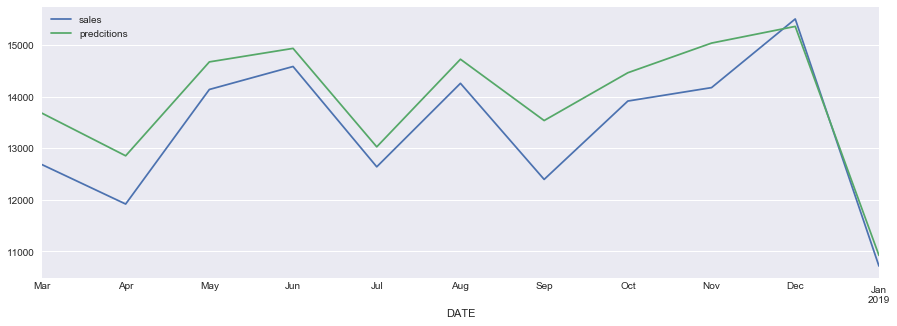

In [131]:
test.plot(figsize = (15,5), legend = True)
plt.show()

In [ ]:
# model.save('mymodel.h5')

In [ ]:
# from keras.models import load_model
# new_model = load_model('mymodel.h5')